In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot
import scipy.stats as ss
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, log_loss, confusion_matrix, precision_score, recall_score, mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import binarize
import math


from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [2]:
# we want to know how our demographics tell us about our health. 
# is the insurance charge the correct amount for smokers?
df = pd.read_csv("insurance.csv")
df.dropna()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


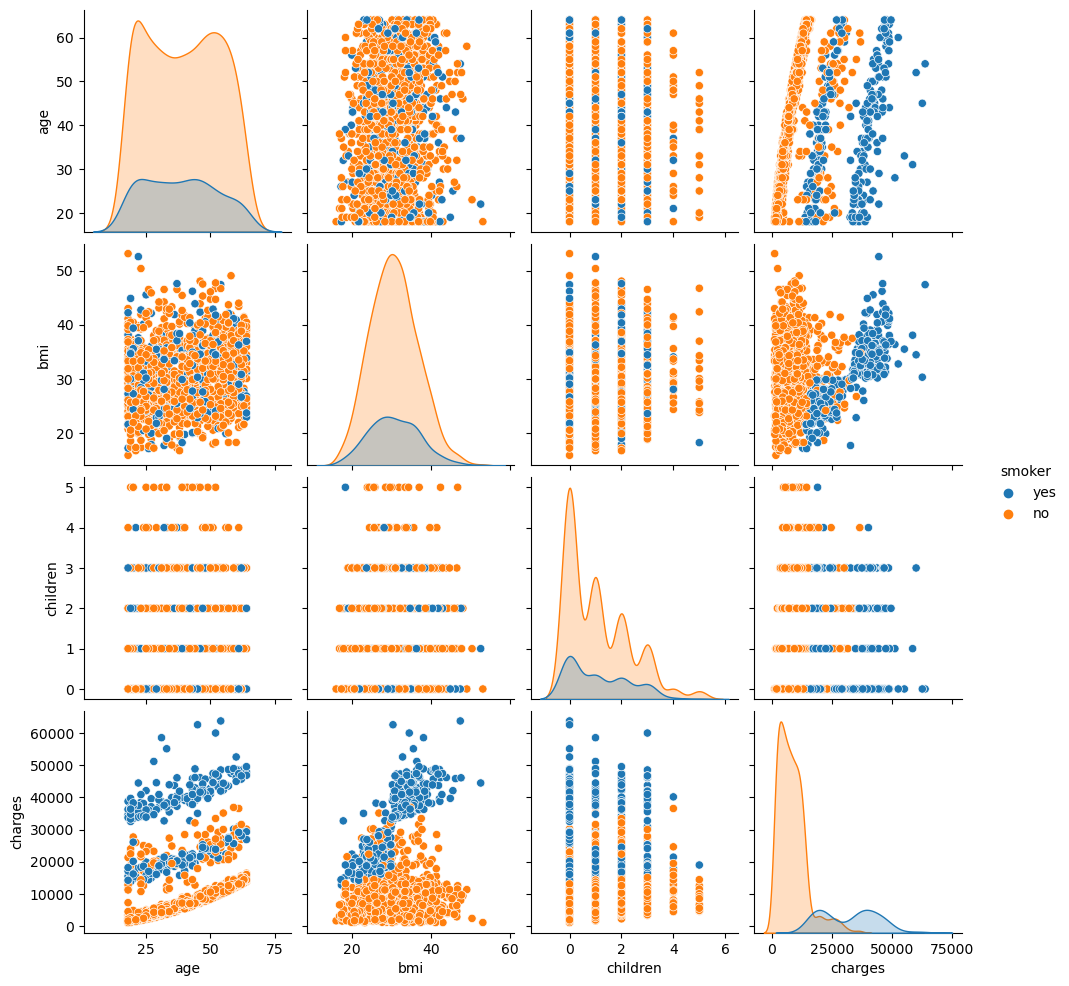

In [3]:
sns.pairplot(df, hue = 'smoker')

In [4]:
sns.boxplot(x="smoker", y="charges", data=df)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

In [5]:
sns.boxplot(x="region", y="charges", data=df)

<AxesSubplot:xlabel='region', ylabel='charges'>

In [6]:
sns.countplot(x="region", data=df)

<AxesSubplot:xlabel='region', ylabel='count'>

In [7]:
sns.boxplot(x="sex", y="charges", data=df)

<AxesSubplot:xlabel='sex', ylabel='charges'>

#sns.boxplot(x="region_northwest", y="charges", data=temp,ax=ax[0,1])
#sns.boxplot(x="region_southeast", y="charges", data=temp,ax=ax[1,0])
#sns.boxplot(x="region_southwest", y="charges", data=temp,ax=ax[1,1])

In [8]:
temp = pd.get_dummies(df)
temp = pd.get_dummies(df, drop_first=True)
temp.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [9]:
corr = temp.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)

C:\Users\Elsa\AppData\Local\Temp\ipykernel_23336\2376731043.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient().set_precision(2)


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.00,0.11,0.04,0.30,-0.02,-0.03,-0.00,-0.01,0.01
bmi,0.11,1.00,0.01,0.20,0.05,0.00,-0.14,0.27,-0.01
children,0.04,0.01,1.00,0.07,0.02,0.01,0.02,-0.02,0.02
charges,0.30,0.20,0.07,1.00,0.06,0.79,-0.04,0.07,-0.04
sex_male,-0.02,0.05,0.02,0.06,1.00,0.08,-0.01,0.02,-0.00
smoker_yes,-0.03,0.00,0.01,0.79,0.08,1.00,-0.04,0.07,-0.04
region_northwest,-0.00,-0.14,0.02,-0.04,-0.01,-0.04,1.00,-0.35,-0.32
region_southeast,-0.01,0.27,-0.02,0.07,0.02,0.07,-0.35,1.00,-0.35
region_southwest,0.01,-0.01,0.02,-0.04,-0.00,-0.04,-0.32,-0.35,1.00


In [10]:
sns.scatterplot(data=temp, x='charges',y='smoker_yes')

<AxesSubplot:xlabel='sex', ylabel='charges'>

In [11]:
def convert_prob_to_label(prob, cutoff = 0.5):
    label = []
    for i in range(len(prob)):
        if prob[i] > cutoff:
            label.append(1)
        else:
            label.append(0)
    return label

In [12]:
# sampler 1
sampler = TomekLinks(sampling_strategy='not majority', n_jobs=-1)
#sampler = SMOTE(n_jobs=-1)
#sampler = ADASYN(n_jobs=-1)
#sampler = SVMSMOTE(n_jobs=-1)

#Build Log Reg model
#Split Data x/y
y4 = np.array(temp['smoker_yes']).reshape(-1,1)
x4 = np.array(temp.drop(columns={"smoker_yes"}))

X_train4, X_test4, y_train4, y_test4 = train_test_split(x4, y4, test_size=0.33)

#Look at relative imbalance after split
X_train4Samp, y_train4Samp = sampler.fit_resample(X_train4, y_train4)
print('Resampled dataset shape %s' % Counter(y_train4Samp))

#Normalize data
#scaler = MinMaxScaler()
#scler is used when the ranges of the variable are very different 
scaler = StandardScaler()
X_train4_norm = scaler.fit_transform(X_train4Samp)
X_test4_norm = scaler.transform(X_test4)

#Train model
model4 = LogisticRegression(max_iter=1000, n_jobs=-1).fit(X_train4_norm,y_train4Samp.ravel())

#Make predictions
preds4 = model4.predict(X_test4_norm)

#Generate 1/0 results and show results
labels4 = binarize(np.array(preds4).reshape(-1,1), threshold=.5)
conf_matrix4 = confusion_matrix(y_test4,labels4)
sns.heatmap(conf_matrix4, annot=True)

print("F1:",f1_score(y_test4, labels4))
print("Acc:",accuracy_score(y_test4, labels4))
print("Recall:",recall_score(y_test4, labels4))
print("Precision:",precision_score(y_test4, labels4))
print("RMSE test:", mean_squared_error(preds4,y_test4,squared=False))

Resampled dataset shape Counter({0: 711, 1: 156})
F1: 0.7906976744186045
Acc: 0.918552036199095
Recall: 0.7640449438202247
Precision: 0.8192771084337349
RMSE test: 0.28539089649269644


In [13]:
# sampler 2
#sampler = TomekLinks(sampling_strategy='not majority', n_jobs=-1)
sampler = SMOTE(n_jobs=-1)
#sampler = ADASYN(n_jobs=-1)
#sampler = SVMSMOTE(n_jobs=-1)

#Build Log Reg model
#Split Data x/y
y5 = np.array(temp['smoker_yes']).reshape(-1,1)
x5 = np.array(temp.drop(columns={"smoker_yes"}))

X_train5, X_test5, y_train5, y_test5 = train_test_split(x5, y5, test_size=0.33)

#Look at relative imbalance after split
X_train5Samp, y_train5Samp = sampler.fit_resample(X_train5, y_train5)
print('Resampled dataset shape %s' % Counter(y_train5Samp))

#Normalize data
#scaler = MinMaxScaler()
#scler is used when the ranges of the variable are very different 
scaler = StandardScaler()
X_train5_norm = scaler.fit_transform(X_train5Samp)
X_test5_norm = scaler.transform(X_test5)

#Train model
model5 = LogisticRegression(max_iter=1000, n_jobs=-1).fit(X_train5_norm,y_train5Samp.ravel())

#Make predictions
preds5 = model5.predict(X_test5_norm)

#Generate 1/0 results and show results
labels5 = binarize(np.array(preds5).reshape(-1,1), threshold=.5)
conf_matrix5 = confusion_matrix(y_test5,labels5)
sns.heatmap(conf_matrix5, annot=True)

print("F1:",f1_score(y_test5, labels5))
print("Acc:",accuracy_score(y_test5, labels5))
print("Recall:",recall_score(y_test5, labels5))
print("Precision:",precision_score(y_test5, labels5))
print("RMSE test:", mean_squared_error(preds5,y_test5,squared=False))

Resampled dataset shape Counter({0: 707, 1: 707})
F1: 0.9090909090909091
Acc: 0.9615384615384616
Recall: 1.0
Precision: 0.8333333333333334
RMSE test: 0.19611613513818404


In [14]:
# sampler 3
#sampler = TomekLinks(sampling_strategy='not majority', n_jobs=-1)
#sampler = SMOTE(n_jobs=-1)
sampler = ADASYN(n_jobs=-1)
#sampler = SVMSMOTE(n_jobs=-1)

#Build Log Reg model
#Split Data x/y
y6 = np.array(temp['smoker_yes']).reshape(-1,1)
x6 = np.array(temp.drop(columns={"smoker_yes"}))

X_train6, X_test6, y_train6, y_test6 = train_test_split(x6, y6, test_size=0.33)

#Look at relative imbalance after split
X_train6Samp, y_train6Samp = sampler.fit_resample(X_train6, y_train6)
print('Resampled dataset shape %s' % Counter(y_train6Samp))

#Normalize data
#scaler = MinMaxScaler()
#scler is used when the ranges of the variable are very different 
scaler = StandardScaler()
X_train6_norm = scaler.fit_transform(X_train6Samp)
X_test6_norm = scaler.transform(X_test6)

#Train model
model6 = LogisticRegression(max_iter=1000, n_jobs=-1).fit(X_train6_norm,y_train6Samp.ravel())

#Make predictions
preds6 = model6.predict(X_test6_norm)

#Generate 1/0 results and show results
labels6 = binarize(np.array(preds6).reshape(-1,1), threshold=.5)
conf_matrix6 = confusion_matrix(y_test6,labels6)
sns.heatmap(conf_matrix6, annot=True)

print("F1:",f1_score(y_test6, labels6))
print("Acc:",accuracy_score(y_test6, labels6))
print("Recall:",recall_score(y_test6, labels6))
print("Precision:",precision_score(y_test6, labels6))
print("RMSE test:", mean_squared_error(preds6,y_test6,squared=False))

Resampled dataset shape Counter({0: 719, 1: 718})
F1: 0.9282296650717704
Acc: 0.9660633484162896
Recall: 1.0
Precision: 0.8660714285714286
RMSE test: 0.184219031545903


In [15]:
# sampler 4
#sampler = TomekLinks(sampling_strategy='not majority', n_jobs=-1)
#sampler = SMOTE(n_jobs=-1)
#sampler = ADASYN(n_jobs=-1)
sampler = SVMSMOTE(n_jobs=-1)

#Build Log Reg model
#Split Data x/y
y7 = np.array(temp['smoker_yes']).reshape(-1,1)
x7 = np.array(temp.drop(columns={"smoker_yes"}))

X_train7, X_test7, y_train7, y_test7 = train_test_split(x7, y7, test_size=0.33)

#Look at relative imbalance after split
X_train7Samp, y_train7Samp = sampler.fit_resample(X_train7, y_train7)
print('Resampled dataset shape %s' % Counter(y_train7Samp))

#Normalize data
#scaler = MinMaxScaler()
#scler is used when the ranges of the variable are very different 
scaler = StandardScaler()
X_train7_norm = scaler.fit_transform(X_train7Samp)
X_test7_norm = scaler.transform(X_test7)

#Train model
model7 = LogisticRegression(max_iter=1000, n_jobs=-1).fit(X_train7_norm,y_train7Samp.ravel())

#Make predictions
preds7 = model7.predict(X_test7_norm)

#Generate 1/0 results and show results
labels7 = binarize(np.array(preds7).reshape(-1,1), threshold=.5)
conf_matrix7 = confusion_matrix(y_test7,labels7)
sns.heatmap(conf_matrix7, annot=True)

print("F1:",f1_score(y_test7, labels7))
print("Acc:",accuracy_score(y_test7, labels7))
print("Recall:",recall_score(y_test7, labels7))
print("Precision:",precision_score(y_test7, labels7))
print("RMSE test:", mean_squared_error(preds7,y_test7,squared=False))

Resampled dataset shape Counter({0: 717, 1: 717})
F1: 0.9452736318407959
Acc: 0.9751131221719457
Recall: 1.0
Precision: 0.8962264150943396
RMSE test: 0.15775575370823816


In [16]:
# sampler 5
sampler = TomekLinks(sampling_strategy='not majority', n_jobs=-1)
#sampler = SMOTE(n_jobs=-1)
#sampler = ADASYN(n_jobs=-1)
#sampler = SVMSMOTE(n_jobs=-1)

#Split Data x/y
y8 = np.array(temp['smoker_yes']).reshape(-1,1)
x8 = np.array(temp.drop(columns={"smoker_yes"}))

X_train8, X_test8, y_train8, y_test8 = train_test_split(x8, y8, test_size=0.33)

#Look at relative imbalance after split
X_train8Samp, y_train8Samp = sampler.fit_resample(X_train8, y_train8)
print('Resampled dataset shape %s' % Counter(y_train8Samp))

#Normalize data
#scaler = MinMaxScaler()
scaler = StandardScaler()
X_train8_norm = scaler.fit_transform(X_train8Samp)
X_test8_norm = scaler.transform(X_test8)

#Train model
model8 = RandomForestClassifier(n_jobs=-1).fit(X_train8_norm,y_train8Samp.ravel())
#Make predictions
preds8 = model8.predict(X_test8_norm)

#Generate 1/0 results and show results
labels8 = binarize(np.array(preds8).reshape(-1,1), threshold=.5)
conf_matrix8 = confusion_matrix(y_test8,labels8)
sns.heatmap(conf_matrix8, annot=True)

print("F1:",f1_score(y_test8, labels8))
print("Acc:",accuracy_score(y_test8, labels8))
print("Recall:",recall_score(y_test8, labels8))
print("Precision:",precision_score(y_test8, labels8))
print("RMSE test:", mean_squared_error(preds8,y_test8,squared=False))

Resampled dataset shape Counter({0: 722, 1: 143})
F1: 0.8494623655913979
Acc: 0.9366515837104072
Recall: 0.79
Precision: 0.9186046511627907
RMSE test: 0.25169111285381685


In [17]:
# sampler 6
#sampler = TomekLinks(sampling_strategy='not majority', n_jobs=-1)
sampler = SMOTE(n_jobs=-1)
#sampler = ADASYN(n_jobs=-1)
#sampler = SVMSMOTE(n_jobs=-1)

#Split Data x/y
y9 = np.array(temp['smoker_yes']).reshape(-1,1)
x9 = np.array(temp.drop(columns={"smoker_yes"}))

X_train9, X_test9, y_train9, y_test9 = train_test_split(x9, y9, test_size=0.33)

#Look at relative imbalance after split
X_train9Samp, y_train9Samp = sampler.fit_resample(X_train9, y_train9)
print('Resampled dataset shape %s' % Counter(y_train9Samp))

#Normalize data
#scaler = MinMaxScaler()
scaler = StandardScaler()
X_train9_norm = scaler.fit_transform(X_train9Samp)
X_test9_norm = scaler.transform(X_test9)

#Train model
model9 = RandomForestClassifier(n_jobs=-1).fit(X_train9_norm,y_train9Samp.ravel())
#Make predictions
preds9 = model9.predict(X_test9_norm)

#Generate 1/0 results and show results
labels9 = binarize(np.array(preds9).reshape(-1,1), threshold=.5)
conf_matrix9 = confusion_matrix(y_test9,labels9)
sns.heatmap(conf_matrix9, annot=True)

print("F1:",f1_score(y_test9, labels9))
print("Acc:",accuracy_score(y_test9, labels9))
print("Recall:",recall_score(y_test9, labels9))
print("Precision:",precision_score(y_test9, labels9))
print("RMSE test:", mean_squared_error(preds9,y_test9,squared=False))

Resampled dataset shape Counter({0: 713, 1: 713})
F1: 0.8994708994708994
Acc: 0.9570135746606335
Recall: 0.9340659340659341
Precision: 0.8673469387755102
RMSE test: 0.2073316795363567


In [25]:
# sampler 7
#sampler = TomekLinks(sampling_strategy='not majority', n_jobs=-1)
#sampler = SMOTE(n_jobs=-1)
sampler = ADASYN(n_jobs=-1)
#sampler = SVMSMOTE(n_jobs=-1)

#Split Data x/y
y91 = np.array(temp['smoker_yes']).reshape(-1,1)
x91 = np.array(temp.drop(columns={"smoker_yes"}))

X_train91, X_test91, y_train91, y_test91 = train_test_split(x91, y91, test_size=0.33)

#Look at relative imbalance after split
X_train91Samp, y_train91Samp = sampler.fit_resample(X_train91, y_train91)
print('Resampled dataset shape %s' % Counter(y_train91Samp))

#Normalize data
#scaler = MinMaxScaler()
scaler = StandardScaler()
X_train91_norm = scaler.fit_transform(X_train91Samp)
X_test91_norm = scaler.transform(X_test91)

#Train model
model91 = RandomForestClassifier(n_jobs=-1).fit(X_train91_norm,y_train91Samp.ravel())
#Make predictions
preds91 = model91.predict(X_test91_norm)

#Generate 1/0 results and show results
labels91 = binarize(np.array(preds91).reshape(-1,1), threshold=.5)
conf_matrix91 = confusion_matrix(y_test91,labels91)
sns.heatmap(conf_matrix91, annot=True)

print("F1:",f1_score(y_test91, labels91))
print("Acc:",accuracy_score(y_test91, labels91))
print("Recall:",recall_score(y_test91, labels91))
print("Precision:",precision_score(y_test91, labels91))
print("RMSE test:", mean_squared_error(preds91,y_test91,squared=False))

Resampled dataset shape Counter({1: 716, 0: 705})
F1: 0.9101796407185628
Acc: 0.9660633484162896
Recall: 0.9156626506024096
Precision: 0.9047619047619048
RMSE test: 0.184219031545903


In [19]:
# sampler 8
#sampler = TomekLinks(sampling_strategy='not majority', n_jobs=-1)
#sampler = SMOTE(n_jobs=-1)
#sampler = ADASYN(n_jobs=-1)
sampler = SVMSMOTE(n_jobs=-1)

#Split Data x/y
y92 = np.array(temp['smoker_yes']).reshape(-1,1)
x92 = np.array(temp.drop(columns={"smoker_yes"}))

X_train92, X_test92, y_train92, y_test92 = train_test_split(x92, y92, test_size=0.33)

#Look at relative imbalance after split
X_train92Samp, y_train92Samp = sampler.fit_resample(X_train92, y_train92)
print('Resampled dataset shape %s' % Counter(y_train92Samp))

#Normalize data
#scaler = MinMaxScaler()
scaler = StandardScaler()
X_train92_norm = scaler.fit_transform(X_train92Samp)
X_test92_norm = scaler.transform(X_test92)

#Train model
model92 = RandomForestClassifier(n_jobs=-1).fit(X_train92_norm,y_train92Samp.ravel())
#Make predictions
preds92 = model92.predict(X_test92_norm)

#Generate 1/0 results and show results
labels92 = binarize(np.array(preds92).reshape(-1,1), threshold=.5)
conf_matrix92 = confusion_matrix(y_test92,labels92)
sns.heatmap(conf_matrix92, annot=True)

print("F1:",f1_score(y_test92, labels92))
print("Acc:",accuracy_score(y_test92, labels92))
print("Recall:",recall_score(y_test92, labels92))
print("Precision:",precision_score(y_test92, labels92))
print("RMSE test:", mean_squared_error(preds92,y_test92,squared=False))

Resampled dataset shape Counter({0: 713, 1: 713})
F1: 0.8842105263157896
Acc: 0.9502262443438914
Recall: 0.9230769230769231
Precision: 0.8484848484848485
RMSE test: 0.2231003264365801


In [21]:
# sampler 9
sampler = TomekLinks(sampling_strategy='not majority', n_jobs=-1)
#sampler = SMOTE(n_jobs=-1)
#sampler = ADASYN(n_jobs=-1)
#sampler = SVMSMOTE(n_jobs=-1)

#Split Data x/y
y11 = np.array(temp['smoker_yes']).reshape(-1,1)
x11 = np.array(temp.drop(columns={"smoker_yes"}))

X_train11, X_test11, y_train11, y_test11 = train_test_split(x11, y11, test_size=0.33)

#Look at relative imbalance after split
X_train11Samp, y_train11Samp = sampler.fit_resample(X_train11, y_train11)
print('Resampled dataset shape %s' % Counter(y_train11Samp))

#Normalize data
scaler = MinMaxScaler()
#scaler = StandardScaler()
X_train11_norm = scaler.fit_transform(X_train11Samp)
X_test11_norm = scaler.transform(X_test11)

#Train model
model11 = RandomForestClassifier(n_jobs=-1).fit(X_train11_norm,y_train11Samp.ravel())
#Make predictions
preds11 = model11.predict(X_test11_norm)

#Generate 1/0 results and show results
labels11 = binarize(np.array(preds11).reshape(-1,1), threshold=.5)
conf_matrix11 = confusion_matrix(y_test11,labels11)
sns.heatmap(conf_matrix11, annot=True)

print("F1:",f1_score(y_test11, labels11))
print("Acc:",accuracy_score(y_test11, labels11))
print("Recall:",recall_score(y_test11, labels11))
print("Precision:",precision_score(y_test11, labels11))
print("RMSE test:", mean_squared_error(preds11,y_test11,squared=False))

Resampled dataset shape Counter({0: 705, 1: 167})
F1: 0.8757396449704141
Acc: 0.9524886877828054
Recall: 0.891566265060241
Precision: 0.8604651162790697
RMSE test: 0.21797089763818142


In [22]:
# sampler 10
#sampler = TomekLinks(sampling_strategy='not majority', n_jobs=-1)
sampler = SMOTE(n_jobs=-1)
#sampler = ADASYN(n_jobs=-1)
#sampler = SVMSMOTE(n_jobs=-1)

#Split Data x/y
y12 = np.array(temp['smoker_yes']).reshape(-1,1)
x12 = np.array(temp.drop(columns={"smoker_yes"}))

X_train12, X_test12, y_train12, y_test12 = train_test_split(x12, y12, test_size=0.33)

#Look at relative imbalance after split
X_train12Samp, y_train12Samp = sampler.fit_resample(X_train12, y_train12)
print('Resampled dataset shape %s' % Counter(y_train12Samp))

#Normalize data
scaler = MinMaxScaler()
#scaler = StandardScaler()
X_train12_norm = scaler.fit_transform(X_train12Samp)
X_test12_norm = scaler.transform(X_test12)

#Train model
model12 = RandomForestClassifier(n_jobs=-1).fit(X_train12_norm,y_train12Samp.ravel())
#Make predictions
preds12 = model12.predict(X_test12_norm)

#Generate 1/0 results and show results
labels12 = binarize(np.array(preds12).reshape(-1,1), threshold=.5)
conf_matrix12 = confusion_matrix(y_test12,labels12)
sns.heatmap(conf_matrix12, annot=True)

print("F1:",f1_score(y_test12, labels12))
print("Acc:",accuracy_score(y_test12, labels12))
print("Recall:",recall_score(y_test12, labels12))
print("Precision:",precision_score(y_test12, labels12))
print("RMSE test:", mean_squared_error(preds12,y_test12,squared=False))

Resampled dataset shape Counter({0: 722, 1: 722})
F1: 0.9065420560747663
Acc: 0.9547511312217195
Recall: 0.97
Precision: 0.8508771929824561
RMSE test: 0.21271781490575853


In [23]:
# sampler 11
#sampler = TomekLinks(sampling_strategy='not majority', n_jobs=-1)
#sampler = SMOTE(n_jobs=-1)
sampler = ADASYN(n_jobs=-1)
#sampler = SVMSMOTE(n_jobs=-1)

#Split Data x/y
y13 = np.array(temp['smoker_yes']).reshape(-1,1)
x13 = np.array(temp.drop(columns={"smoker_yes"}))

X_train13, X_test13, y_train13, y_test13 = train_test_split(x13, y13, test_size=0.33)

#Look at relative imbalance after split
X_train13Samp, y_train13Samp = sampler.fit_resample(X_train13, y_train13)
print('Resampled dataset shape %s' % Counter(y_train13Samp))

#Normalize data
scaler = MinMaxScaler()
#scaler = StandardScaler()
X_train13_norm = scaler.fit_transform(X_train13Samp)
X_test13_norm = scaler.transform(X_test13)

#Train model
model13 = RandomForestClassifier(n_jobs=-1).fit(X_train13_norm,y_train13Samp.ravel())
#Make predictions
preds13 = model13.predict(X_test13_norm)

#Generate 1/0 results and show results
labels13 = binarize(np.array(preds13).reshape(-1,1), threshold=.5)
conf_matrix13 = confusion_matrix(y_test13,labels13)
sns.heatmap(conf_matrix13, annot=True)

print("F1:",f1_score(y_test13, labels13))
print("Acc:",accuracy_score(y_test13, labels13))
print("Recall:",recall_score(y_test13, labels13))
print("Precision:",precision_score(y_test13, labels13))
print("RMSE test:", mean_squared_error(preds13,y_test13,squared=False))

Resampled dataset shape Counter({1: 729, 0: 713})
F1: 0.8979591836734694
Acc: 0.9547511312217195
Recall: 0.967032967032967
Precision: 0.8380952380952381
RMSE test: 0.21271781490575853


In [24]:
# sampler 12
#sampler = TomekLinks(sampling_strategy='not majority', n_jobs=-1)
#sampler = SMOTE(n_jobs=-1)
#sampler = ADASYN(n_jobs=-1)
sampler = SVMSMOTE(n_jobs=-1)

#Split Data x/y
y14 = np.array(temp['smoker_yes']).reshape(-1,1)
x14 = np.array(temp.drop(columns={"smoker_yes"}))

X_train14, X_test14, y_train14, y_test14 = train_test_split(x14, y14, test_size=0.33)

#Look at relative imbalance after split
X_train14Samp, y_train14Samp = sampler.fit_resample(X_train14, y_train14)
print('Resampled dataset shape %s' % Counter(y_train14Samp))

#Normalize data
scaler = MinMaxScaler()
#scaler = StandardScaler()
X_train14_norm = scaler.fit_transform(X_train14Samp)
X_test14_norm = scaler.transform(X_test14)

#Train model
model14 = RandomForestClassifier(n_jobs=-1).fit(X_train14_norm,y_train14Samp.ravel())
#Make predictions
preds14 = model14.predict(X_test14_norm)

#Generate 1/0 results and show results
labels14 = binarize(np.array(preds14).reshape(-1,1), threshold=.5)
conf_matrix14 = confusion_matrix(y_test14,labels14)
sns.heatmap(conf_matrix14, annot=True)

print("F1:",f1_score(y_test14, labels14))
print("Acc:",accuracy_score(y_test14, labels14))
print("Recall:",recall_score(y_test14, labels14))
print("Precision:",precision_score(y_test14, labels14))
print("RMSE test:", mean_squared_error(preds14,y_test14,squared=False))


Resampled dataset shape Counter({0: 719, 1: 719})
F1: 0.8857142857142857
Acc: 0.9457013574660633
Recall: 0.9587628865979382
Precision: 0.8230088495575221
RMSE test: 0.2330206912141852
